In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.duplicated().sum()

418

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df['sentiment'] = df['sentiment'].map({'positive':1,'negative':0})

In [8]:
df.rename(columns={'sentiment':'target'},inplace=True)

In [9]:
df.head()

,review,target
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
df['target'].value_counts()

target
1    24884
0    24698
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2153d0db790>,
 [Text(-0.006481911407536943, 1.0999809020271694, 'yes'),
  Text(0.006482014395181169, -1.0999809014202842, 'no')],
 [Text(-0.0035355880404746957, 0.5999895829239105, '0.2f'),
  Text(0.0035356442155533648, -0.5999895825928822, '0.2f')])

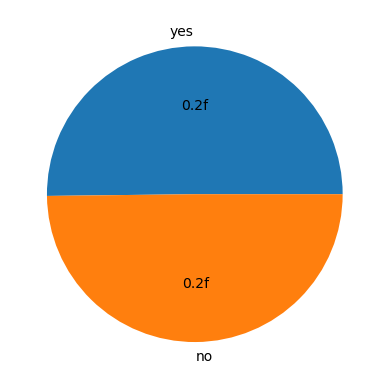

In [11]:
plt.pie(df['target'].value_counts(),labels=['yes','no'],autopct='0.2f')

In [12]:
df['num_characteers'] = df['review'].apply(len)

In [13]:
df.head()

,review,target,num_characteers
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
df['review']=df['review'].apply(lambda x:x.lower())

In [16]:
# df['review']

In [17]:
from nltk.tokenize import sent_tokenize

In [18]:
df['num_words'] = df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df['num_sentance'] = df['review'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,review,target,num_characteers,num_words,num_sentance
0,one of the other reviewers has mentioned that ...,1,1761,380,10
1,a wonderful little production. <br /><br />the...,1,998,201,7
2,i thought this was a wonderful way to spend ti...,1,926,205,4
3,basically there's a family where a little boy ...,0,748,175,6
4,"petter mattei's ""love in the time of money"" is...",1,1317,283,9


In [21]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

def preprocess_text(df, column_name):
    """
    Preprocesses the text data in the specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column containing text data to preprocess.

    Returns:
        pd.DataFrame: The DataFrame with added columns for various preprocessing steps.
    """
    # Ensure NLTK resources are downloaded
    nltk.download('punkt')
    nltk.download('stopwords')

    # Initialize objects
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()

    # 1. Add a column for the number of characters
    df['num_characters'] = df[column_name].apply(len)

    # 2. Define transformation function
    def transformend_text(text):
        text = text.lower()
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = nltk.word_tokenize(text)
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
        text = y[:]
        y.clear()
        for i in text:
            if i not in stop_words and i not in string.punctuation:
                y.append(ps.stem(i))
        return " ".join(y)

    # 3. Apply the transformation
    df['transformed_txt'] = df[column_name].apply(transformend_text)

    return df


In [22]:
from bs4 import BeautifulSoup

In [23]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

In [24]:
# Apply the function to the 'review' column
df['transformed_txt'] = df['review'].apply(remove_html_tags)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12936\3642797177.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [25]:
df['transformed_txt'] = df['transformed_txt'].apply(lambda x: ''.join(ch for ch in x if ch not in string.punctuation))

In [26]:
# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

In [27]:
# Function to remove stopwords from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


In [28]:
# Apply the function to the 'review' column
df['transformed_txt'] = df['transformed_txt'].apply(remove_stopwords)

In [29]:
df['transformed_txt'] = df['transformed_txt'].apply(lambda x: ''.join([char for char in x if not char.isdigit()]))

In [30]:
df.head()

,review,target,num_characteers,num_words,num_sentance,transformed_txt
0,one of the other reviewers has mentioned that ...,1,1761,380,10,one reviewers mentioned watching oz episode y...
1,a wonderful little production. <br /><br />the...,1,998,201,7,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,1,926,205,4,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,0,748,175,6,basically theres family little boy jake thinks...
4,"petter mattei's ""love in the time of money"" is...",1,1317,283,9,petter matteis love time money visually stunni...


In [31]:
from nltk.stem.porter import PorterStemmer

In [32]:
ps = PorterStemmer()

In [33]:
# Function to apply stemming to each word in a string
def stem_text(text):
    words = nltk.word_tokenize(text)  # Tokenize the text
    stemmed_words = [ps.stem(word) for word in words]  # Stem each word
    return ' '.join(stemmed_words)  # Join back into a single string

In [34]:
# Apply the function to the DataFrame column
df['transformed_txt'] = df['transformed_txt'].apply(stem_text)

In [35]:
df.head()

,review,target,num_characteers,num_words,num_sentance,transformed_txt
0,one of the other reviewers has mentioned that ...,1,1761,380,10,one review mention watch oz episod youll hook ...
1,a wonderful little production. <br /><br />the...,1,998,201,7,wonder littl product film techniqu unassum old...
2,i thought this was a wonderful way to spend ti...,1,926,205,4,thought wonder way spend time hot summer weeke...
3,basically there's a family where a little boy ...,0,748,175,6,basic there famili littl boy jake think there ...
4,"petter mattei's ""love in the time of money"" is...",1,1317,283,9,petter mattei love time money visual stun film...


In [25]:
import seaborn as sns

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

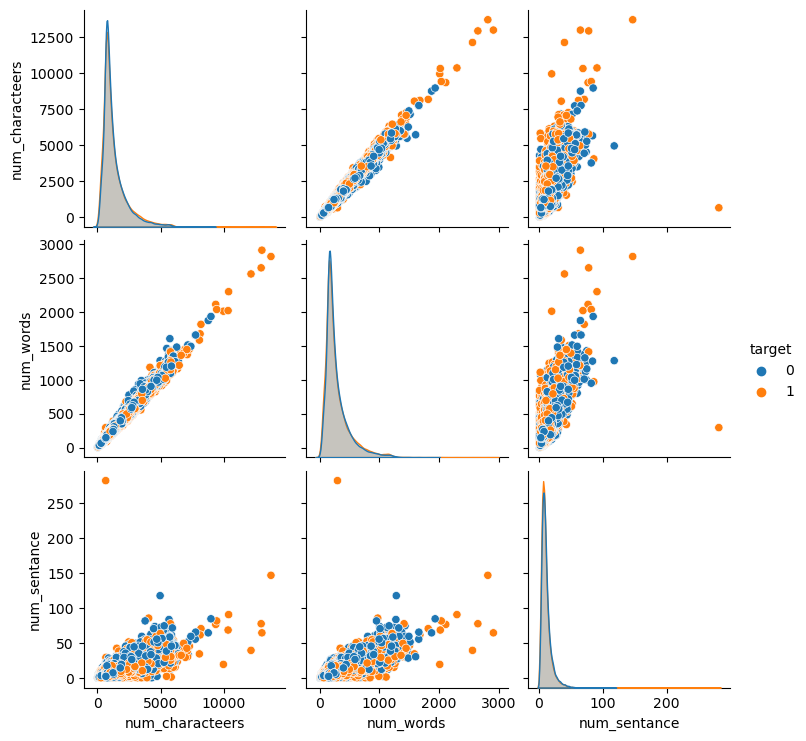

In [27]:
sns.pairplot(df,hue='target')

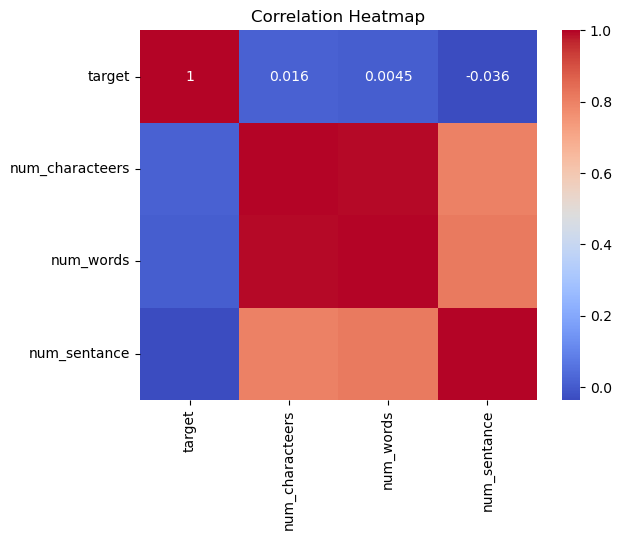

In [28]:
# Filter numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [30]:
positive_wc = wc.generate(df[df['target'] == 1]['transformed_txt'].astype(str).str.cat(sep=" "))

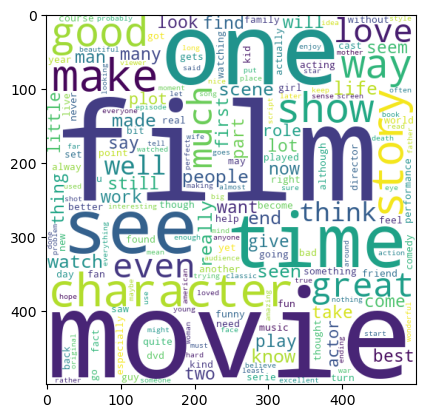

In [31]:
plt.imshow(positive_wc)

In [32]:
negative_wc = wc.generate(df[df['target']==0]['transformed_txt'].astype(str).str.cat(sep = " "))

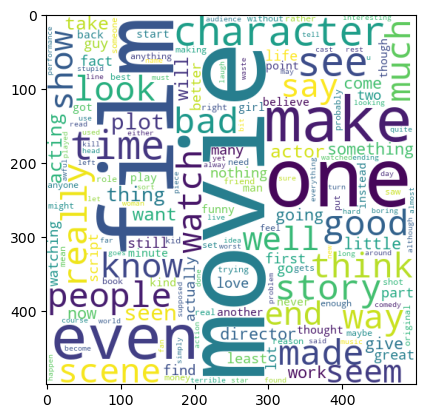

In [33]:
plt.imshow(negative_wc)

In [47]:
# Use the pre-tokenized data
corpus = df['transformed_txt'].tolist()

In [48]:
# Preprocess the corpus
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    stop_words = set(stopwords.words('english'))  # Load stop words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

In [49]:
# Tokenize the corpus
processed_corpus = [preprocess_text(text) for text in corpus]

In [50]:
from gensim.models import Word2Vec

# Train the Word2Vec model
model = Word2Vec(
    sentences=processed_corpus,  # Tokenized sentences
    vector_size=100,  # Dimensionality of word vectors
    window=5,         # Context window size
    min_count=2,      # Minimum frequency of words to be included
    workers=4,        # Number of CPU threads
    sg=0              # 0 for CBOW, 1 for Skip-Gram
)

# Save the model for future use
model.save("word2vec.model")


In [51]:
# Load the model
model = Word2Vec.load("word2vec.model")

In [56]:
# Get the average word vector for a sentence
import numpy as np

def sentence_to_vector(sentence, model):
    tokens = preprocess_text(sentence)
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)


In [61]:
from sklearn.model_selection import train_test_split

# Example data (text vectors and corresponding labels)
X = [sentence_to_vector(sentence, model) for sentence in df['transformed_txt']]  # Feature vectors
y = df['target'].values  # Corresponding labels (e.g., 0 for negative, 1 for positive)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [ ]:
# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy}")

In [34]:
positive_corpus = []
for msg in df[df['target'] == 1]['transformed_txt'].tolist():
    if isinstance(msg, list):  # Check if msg is a list
        positive_corpus.extend(msg)  # Add words directly if it's a list
    elif isinstance(msg, str):  # Check if msg is a string
        positive_corpus.extend(msg.split())  # Split and add words if it's a string


In [35]:
len(positive_corpus)

5702517

In [36]:
from collections import Counter

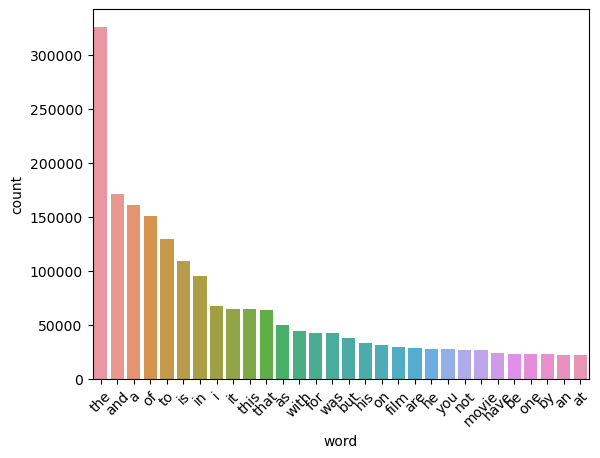

In [37]:
# Get the most common words and their counts
common_words = pd.DataFrame(Counter(positive_corpus).most_common(30), columns=['word', 'count'])

# Plot the bar chart
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation=45)
plt.show()

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
#for small datase t use :-CountVectorizer,

In [38]:
tfidf = TfidfVectorizer(max_features=4000)

In [39]:
X = tfidf.fit_transform(df['transformed_txt']).toarray()

In [40]:
y = df['target'].values

In [41]:
# Before Rnn model apply convert the X to 3D shape
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
y_train.shape

(39665,)

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, SimpleRNN, Dropout

In [46]:
#Simple RNN model

In [108]:
model = Sequential()

In [109]:
model.add(SimpleRNN(units=32, input_shape=(1, X.shape[2]), return_sequences=True))  # RNN Layer 1
model.add(Dropout(0.4))
model.add(SimpleRNN(units=64, return_sequences=True))  # RNN Layer 2
model.add(Dropout(0.3))
model.add(SimpleRNN(units=128, return_sequences=False))
# model.add(SimpleRNN(units=32, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid')) 

In [110]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 1, 32)               │         129,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 128)                 │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,097 (625.38 KB)

 Trainable params: 160,097 (625.38 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from tensorflow.keras.optimizers import Adam

In [116]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy','precision'])

In [117]:
history = model.fit(X_train,y_train, epochs=10, batch_size=16, validation_split=0.2,verbose=1)

Epoch 1/10
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.7136 - loss: 0.5568 - precision: 0.7176 - val_accuracy: 0.8800 - val_loss: 0.2894 - val_precision: 0.8770
Epoch 2/10
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8875 - loss: 0.2711 - precision: 0.8816 - val_accuracy: 0.8823 - val_loss: 0.2866 - val_precision: 0.8915
Epoch 3/10
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9024 - loss: 0.2477 - precision: 0.8975 - val_accuracy: 0.8825 - val_loss: 0.2908 - val_precision: 0.8700
Epoch 4/10
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9041 - loss: 0.2403 - precision: 0.8997 - val_accuracy: 0.8805 - val_loss: 0.2984 - val_precision: 0.8736
Epoch 5/10
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9073 - loss: 0.2322 - precision: 0.9054 - val_accuracy: 0.8777 - val_loss: 0.3057 - val_precision: 0.8836
Epoch 6/10
1984/1984 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9134 - loss: 0.2247 - precision: 0.9123 - val_accuracy

In [92]:
#GRU MOdel

In [91]:
model1 = Sequential()

In [92]:
model1.add(GRU(units=300, input_shape=(1, X.shape[2]), return_sequences=True))
# model1.add(Dropout(0.4))  # Adding Dropout to the first GRU layer
model1.add(GRU(units=64, return_sequences=True))
# model1.add(Dropout(0.25))  # Adding Dropout to the second GRU layer
model1.add(GRU(units=32, return_sequences=False))
model1.add(Dropout(0.25))  # Adding Dropout to the third GRU layer
model1.add(Dense(units=1,activation='sigmoid'))

In [93]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
model1.compile(optimizer=Adam(learning_rate=0.00001),loss='binary_crossentropy',metrics=['accuracy','precision','f1'])

In [95]:
history1 = model.fit(X_train,y_train,batch_size=32,validation_split=0.2,epochs=10,verbose=1)

Epoch 1/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9267 - loss: 0.1965 - precision: 0.9250 - val_accuracy: 0.8612 - val_loss: 0.3679 - val_precision: 0.8674
Epoch 2/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9317 - loss: 0.1929 - precision: 0.9301 - val_accuracy: 0.8622 - val_loss: 0.3730 - val_precision: 0.8602
Epoch 3/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9339 - loss: 0.1850 - precision: 0.9323 - val_accuracy: 0.8611 - val_loss: 0.3667 - val_precision: 0.8523
Epoch 4/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9334 - loss: 0.1897 - precision: 0.9310 - val_accuracy: 0.8618 - val_loss: 0.3731 - val_precision: 0.8606
Epoch 5/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9311 - loss: 0.1944 - precision: 0.9310 - val_accuracy: 0.8612 - val_loss: 0.3805 - val_precision: 0.8644
Epoch 6/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9352 - loss: 0.1858 - precision: 0.9342 - val_accuracy: 0.8613 - va

In [98]:
#LSTM

In [99]:
model2 = Sequential()

In [100]:
model2.add(LSTM(units=32,input_shape=(1,X.shape[2]),return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(units=64,return_sequences=True))
model2.add(Dropout(0.25))
model2.add(LSTM(units=128,return_sequences=False))
model2.add(Dropout(0.25))
model2.add(Dense(units=1,activation='sigmoid'))

In [101]:
model2.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy','precision'])

In [102]:
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1, 32)               │         516,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 64)               │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 640,001 (2.44 MB)

 Trainable params: 640,001 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
history2 = model2.fit(X_train,y_train,batch_size=32,validation_split=0.2,epochs=10,verbose=1)

Epoch 1/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6180 - loss: 0.6585 - precision: 0.5891 - val_accuracy: 0.8686 - val_loss: 0.3187 - val_precision: 0.8551
Epoch 2/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8852 - loss: 0.2839 - precision: 0.8754 - val_accuracy: 0.8916 - val_loss: 0.2674 - val_precision: 0.8798
Epoch 3/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9063 - loss: 0.2360 - precision: 0.8996 - val_accuracy: 0.8930 - val_loss: 0.2617 - val_precision: 0.8886
Epoch 4/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9162 - loss: 0.2141 - precision: 0.9100 - val_accuracy: 0.8932 - val_loss: 0.2619 - val_precision: 0.8862
Epoch 5/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9190 - loss: 0.2093 - precision: 0.9132 - val_accuracy: 0.8926 - val_loss: 0.2663 - val_precision: 0.8854
Epoch 6/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9209 - loss: 0.2013 - precision: 0.9159 - val_accuracy: 0.8921

In [104]:
import os

In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer_sent.pkl','wb'))
pickle.dump(model,open('model2_sent.pkl','wb'))

In [194]:
# pip install transformers

In [193]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np

ModuleNotFoundError: No module named 'transformers'

In [195]:
# Example: Assume df is your dataset with columns "text" and "label"
texts = df['transformed_txt'].values
labels = df['target'].values  # 0 or 1 for sentiment analysis

In [196]:
# Step 1: Tokenization using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize texts (convert to token ids)
input_ids = tokenizer(texts.tolist(), padding=True, truncation=True, max_length=512, return_tensors="np")['input_ids']

# Step 2: Pad sequences
input_ids = pad_sequences(input_ids, maxlen=512, dtype="long", padding="post", truncating="post")

# Step 3: Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

# Step 4: Load the Pretrained BERT model for Sequence Classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=3,
    batch_size=16
)

# Step 7: Evaluate the model on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

NameError: name 'BertTokenizer' is not defined

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [82]:
gnb.fit(X_train,y_train)

GaussianNB()

In [83]:
y_pred = gnb.predict(X_test)

In [84]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7612181103156196
[[3728 1211]
 [1157 3821]]
0.7593402225755167
0.7634365634365634


In [86]:
# mnb.fit(X_train,y_train)

In [155]:
y_pred = mnb.predict(X_test)

In [156]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8446102652011697
[[4094  840]
 [ 701 4282]]
0.8360015618898867
0.8475012370113805


In [87]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [88]:
y_pred = bnb.predict(X_test)

In [89]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7465967530503176
[[3759 1180]
 [1333 3645]]
0.755440414507772
0.7436499030908904


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [91]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [96]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [97]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [98]:
train_classifier(etc,X_train,y_train,X_test,y_test)

(0.8207119088434002, 0.8201280512204882)

In [99]:
# Avoid shadowing sklearn function names
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.40970051426842796
Precision -  0.4029685423128046


AttributeError: 'NoneType' object has no attribute 'split'